In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
sys.path.append(os.path.abspath(os.path.join("..")))
import pandas as pd
from scripts.correlation_analysis import CorrelationAnalysis

- **Load the Data**

In [2]:
df_news = pd.read_csv("../data/raw_analyst_ratings.csv")
df_stock = pd.read_csv("../data/yfinance_data/GOOG_historical_data.csv")
# Drop the auto-generated column 
df_news = df_news.drop(columns=['Unnamed: 0'])
print(df_news.columns)
print(df_stock.columns)
ca = CorrelationAnalysis(df_news,df_stock)

Index(['headline', 'url', 'publisher', 'date', 'stock'], dtype='object')
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


- Converting to the appropriate format

In [3]:
ca.normalize_date()

In [4]:
df_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0


In [5]:

df_news.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A


### **Sentiment Analysis**

In [6]:
# Function to classify sentiment
ca.sentiment_analysis()

Aggregate Sentiment

In [7]:
# Group by date and compute average sentiment
ca.aggregate_sentiment()

,headline,url,publisher,date,stock,sentiment,avg_sentiment
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,0.0,0.110735
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,0.0,0.073184
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,0.0,0.079446
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,0.0,0.062068
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,0.0,0.062068


### **Date Alignment**

In [8]:
ca.align_date()



,headline,url,publisher,stock,sentiment,avg_sentiment,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,A,0.000000,0.110735,2020-06-05,70.658501,72.252502,70.300003,71.919502,71.837753,34698000,0.0,0.0
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,A,0.000000,0.073184,2020-06-03,71.915001,72.327599,71.488853,71.819000,71.737366,25124000,0.0,0.0
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,A,0.000000,0.079446,2020-05-26,71.863503,72.050003,70.606499,70.850998,70.770462,41212000,0.0,0.0
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,A,0.000000,0.062068,2020-05-22,69.835503,70.638000,69.591499,70.521004,70.440842,26188000,0.0,0.0
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,A,0.000000,0.062068,2020-05-22,69.835503,70.638000,69.591499,70.521004,70.440842,26188000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55225,Chinese Nano-Cap Momentum Stocks Sharply Highe...,https://www.benzinga.com/movers/18/01/10994518...,Paul Quintaro,ZX,0.046591,-0.001166,2018-01-05,54.700001,55.212502,54.599998,55.111500,55.048855,25582000,0.0,0.0
55226,28 Stocks Moving In Wednesday's Pre-Market Ses...,https://www.benzinga.com/news/17/12/10878295/2...,Lisa Levin,ZX,0.000000,0.091477,2017-12-06,50.075001,51.248501,50.056999,50.918999,50.861122,25440000,0.0,0.0
55227,China Zenix Auto International Reports Q3 EPAD...,https://www.benzinga.com/news/earnings/17/12/1...,Paul Quintaro,ZX,0.000000,0.091477,2017-12-06,50.075001,51.248501,50.056999,50.918999,50.861122,25440000,0.0,0.0
55228,46 Biggest Movers From Yesterday,https://www.benzinga.com/news/17/11/10788120/4...,Lisa Levin,ZX,0.000000,0.051870,2017-11-15,50.960499,51.204498,50.771000,51.045502,50.987480,17080000,0.0,0.0


### **Analysis**

In [9]:
# Calculate daily stock returns as the percentage change in closing prices

ca.calculate_correlation()

Correlation between avg_sentiment and daily return: -0.02360105198272898


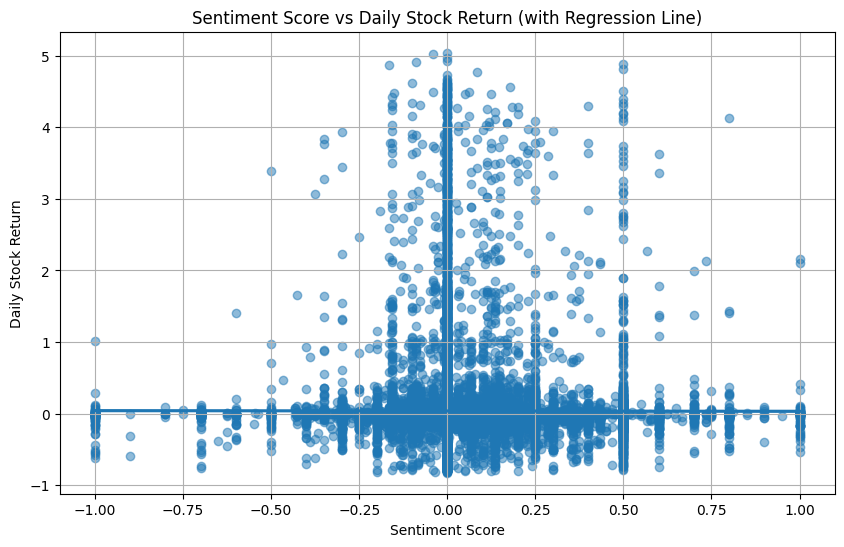

In [10]:
ca.plot_sentiment_vs_daily()

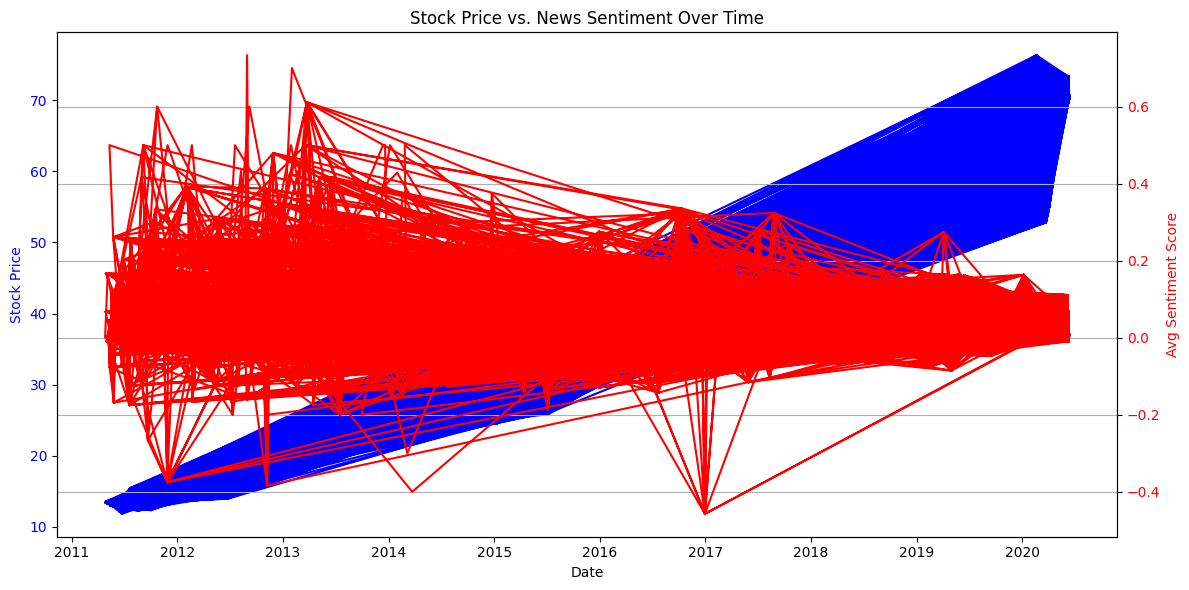

In [11]:
ca.plot_change()
